# <div style='text-align:center; font-family:arial'>🚢titanic data analysis 📈& Machine & Deep Learning 💡</div>

![](https://static.timesofisrael.com/atlantajewishtimes/uploads/2022/03/DT6RD9.jpg)

# Introduction
<b> In this notebook, I will do data analysis, EDA and Machine Learning.<br>
I use Python language in this notebook.<br>
    <br>In Data Analysis, I will get the most valuable result from each column. For doing this, I will process Data through variable ways. You can check how doing it in this notebook
    <br>
    <br>
    And I'll use kinds of Machine Learning.Based on transformated Data, get KNN, Decision Tree, random forrest, Naive Bayes, SVM accuracy score.
    compare its scores and submit the highest score among it.
    <br>
    <br>
    And using tensorflow, predict result by deep learning model. 

## Columns

<b> Survival</b> - Survival   <br> (0 = No , 1 = Yes) <br>
<b> pclass</b> - Ticket class  <br> 1 = 1st, 2 = 2nd, 3 = 3rd<br>
<b> sex</b> - sex <br>
<b> Age</b> - Age in years <br>
<b> sibsp</b> - # of siblings / spouses aboard the Titanic <br>
<b> parch</b> - # of parents / children aboard the Titanic<br>
<b> ticket</b> - Ticket number<br>
<b> fare</b> - Passenger fare<br>
<b> cabin</b> - Cabin number<br>
<b> embarked</b> - Port of Embarkation  <br>C = Cherbourg, Q = Queenstown, S = Southampton<br>

 

    

## Table of Contents
<b> Introduction</b> <br>
    <b>0.</b>-------Import Libraries<br>
    <b>1.</b>-------Visuallization<br>
    <b>1.1</b>------Check Missing Value<br>
    <b>1.2</b>------Make Graph - Which is show "feature"- Dead<br>
    <b>1.3.1</b>---Name<br>
    <b>1.3.2</b>---Sex<br>
    <b>1.3.3</b>---Embarked<br>
    <b>1.3.4</b>---Fare<br>
    <b>1.3.5</b>---Cabin<br>
    <b>1.3.6</b>---Family Size<br>
    <b>2.</b>------Machine Learning<br>
    <b>2.1</b>-----KNN<br>
    <b>2.2</b>-----Decision Tree<br>
    <b>2.3</b>-----Random Forrest<br>
    <b>2.4</b>-----Naive Bayes<br>
    <b>2.5</b>-----SVM<br>
    <b>2.6</b>-----Machine Learning Result<br>
    <b>3.</b>-------Submission

<!-- # <div style="text-align: left; font-family:timeroman;"> | Import Libraries </div> -->
<!-- # <div style="text-align: left; font-family:timeroman;"> <b style='color:blue'>Import</b> Libraries </div> -->
<!-- > <h1 style="text-align: left; font-family:timeroman;"> <b style='color:blue'>Import</b> Libraries </h1> -->
<!-- # <b style='color:blue'> 0. Import Libraries </b> -->
<!-- # <div style=' font-family:timeroman;'> 0. Import Libraries and Data </b> -->

# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 0. Import Libraries </div>

In [1]:
#data
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<b> column explanation

In [4]:
# survived = 0 - d , 1 - alive
# pclass = Ticket class
# sibsp = Wife, uncle, etc. on Titanic. If it's zero, you'll be alone.
# parch = parent + childer
# embarked  = port of Embarktion

In [5]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [6]:
print("train= ",train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train=  None


In [7]:
print("test= ",test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
test=  None


# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 1. Visuallization </div>

# 1.1 Check missing value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Train set')

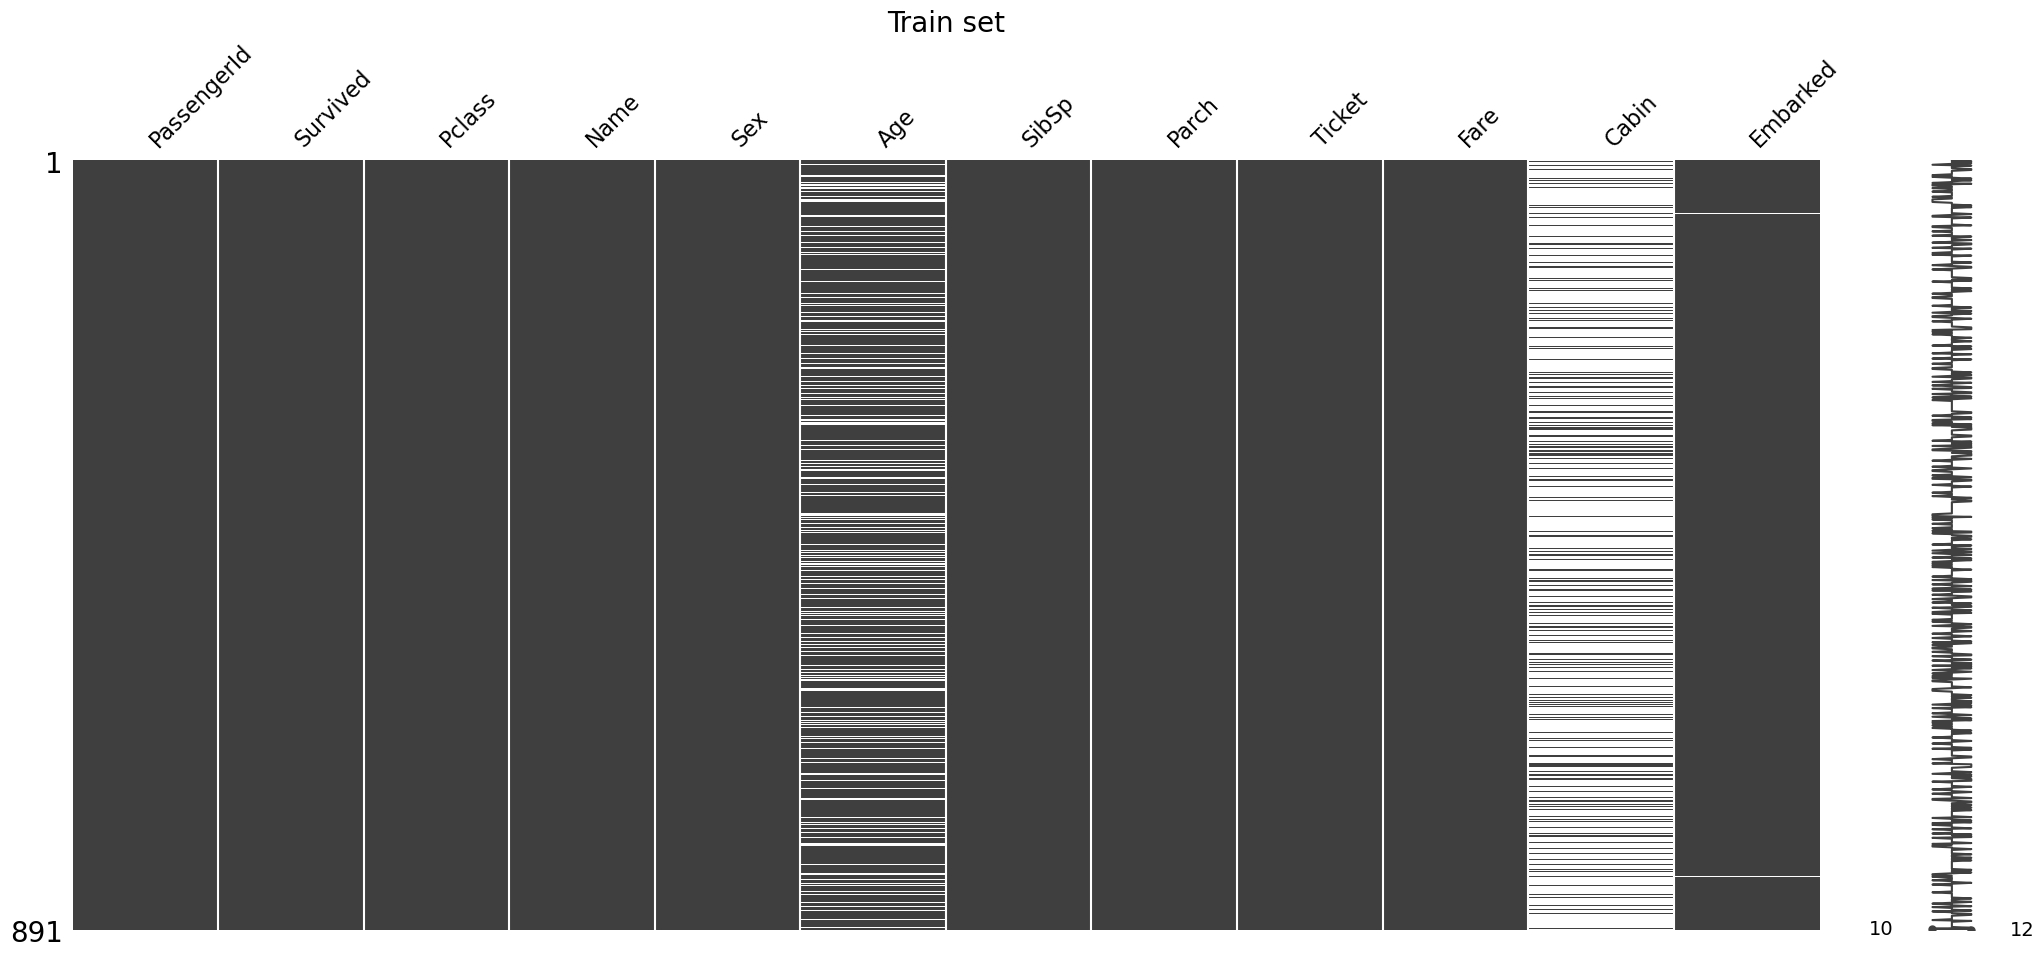

In [8]:
print(train_df.isnull().sum())
msno.matrix(train_df).set_title("Train set",fontsize=20)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Text(0.5, 1.0, 'Train set')

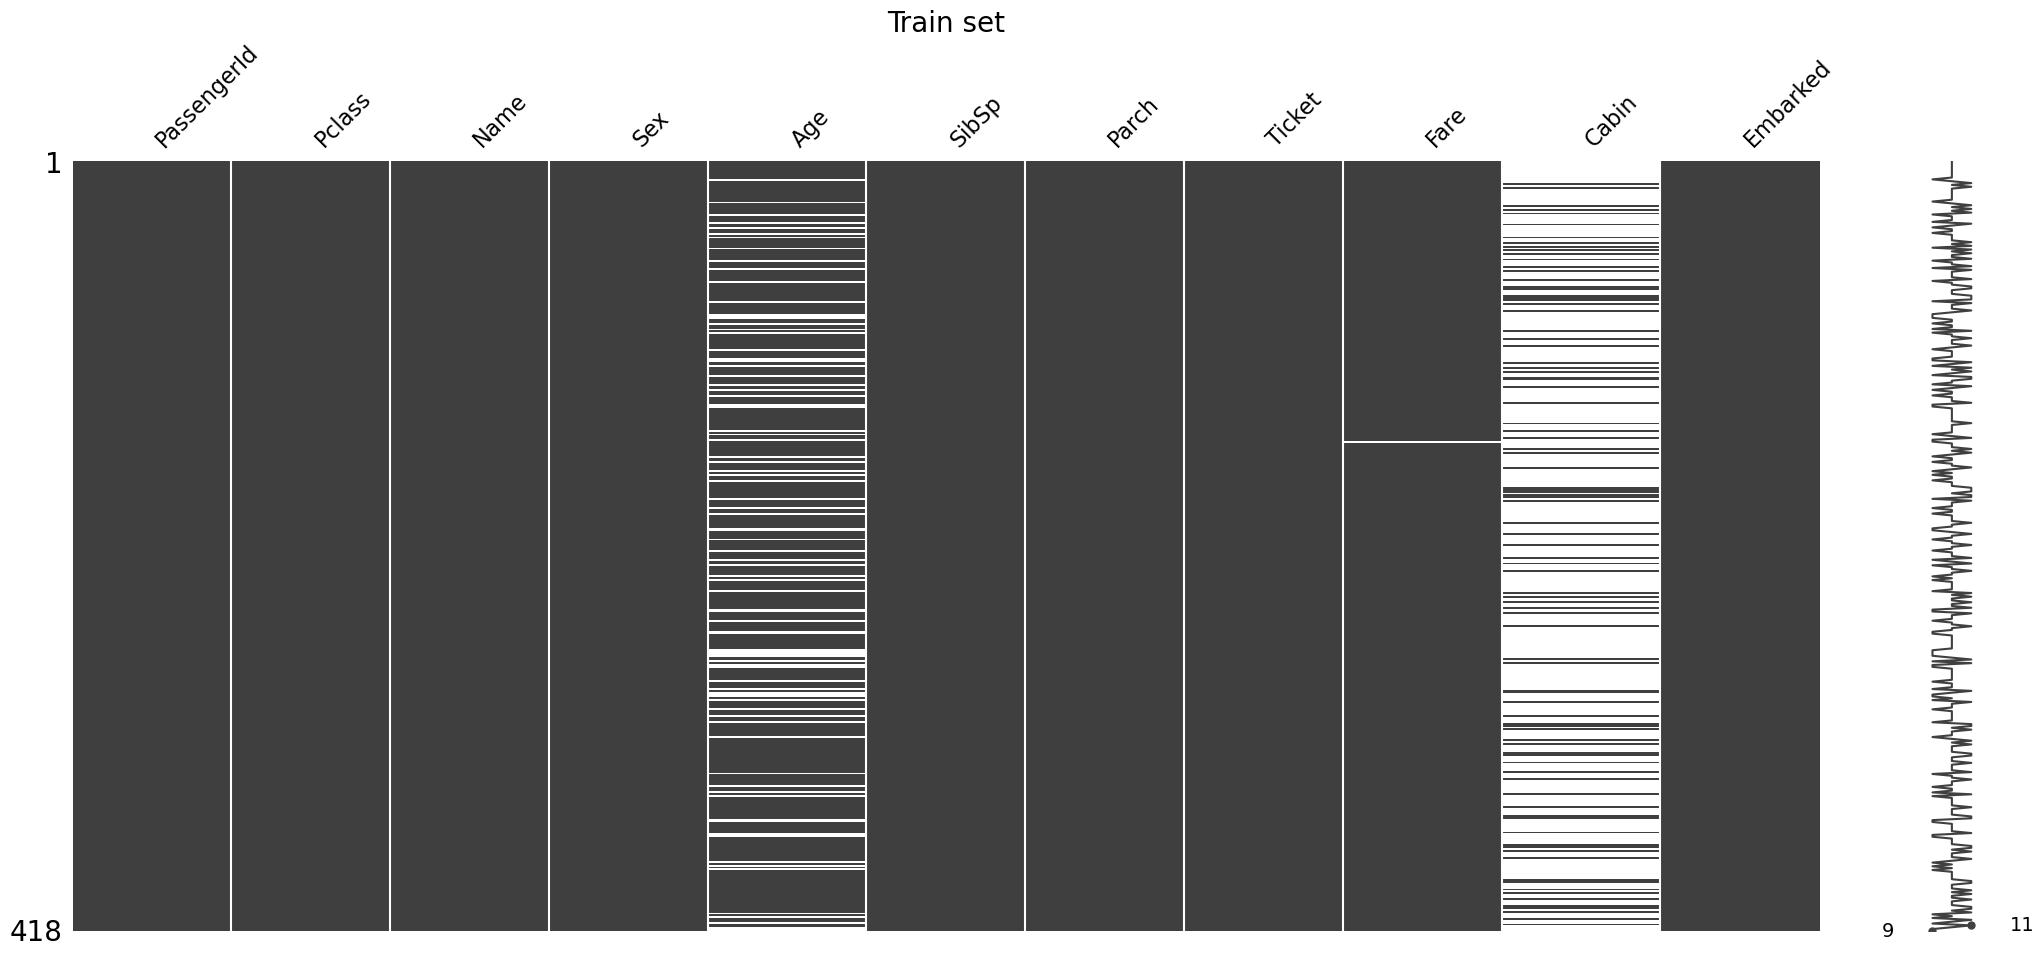

In [9]:
print(test_df.isnull().sum())
msno.matrix(test_df).set_title("Train set",fontsize=20)

# 1.2 Make Graph - Which is show "feature"- Dead. 

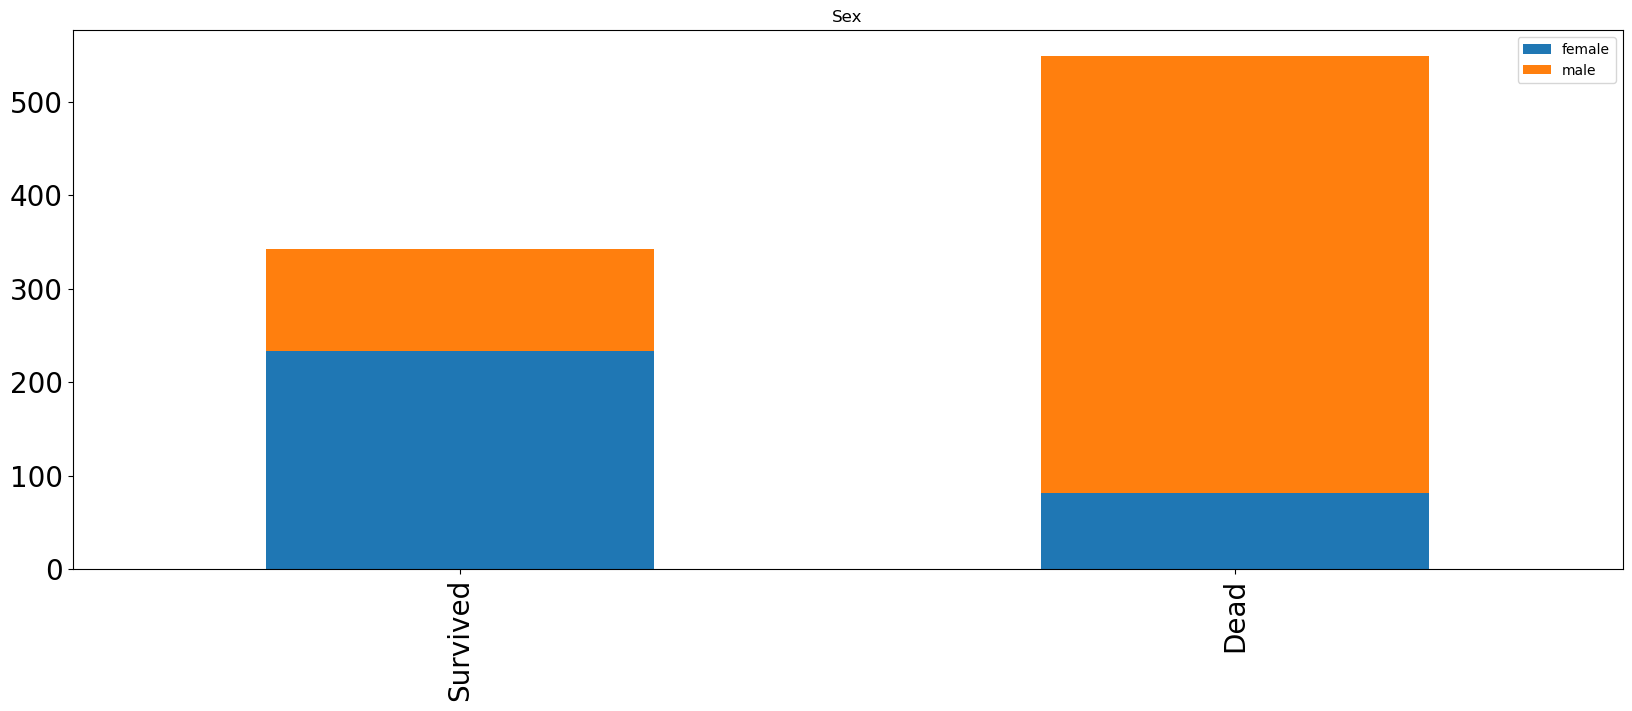

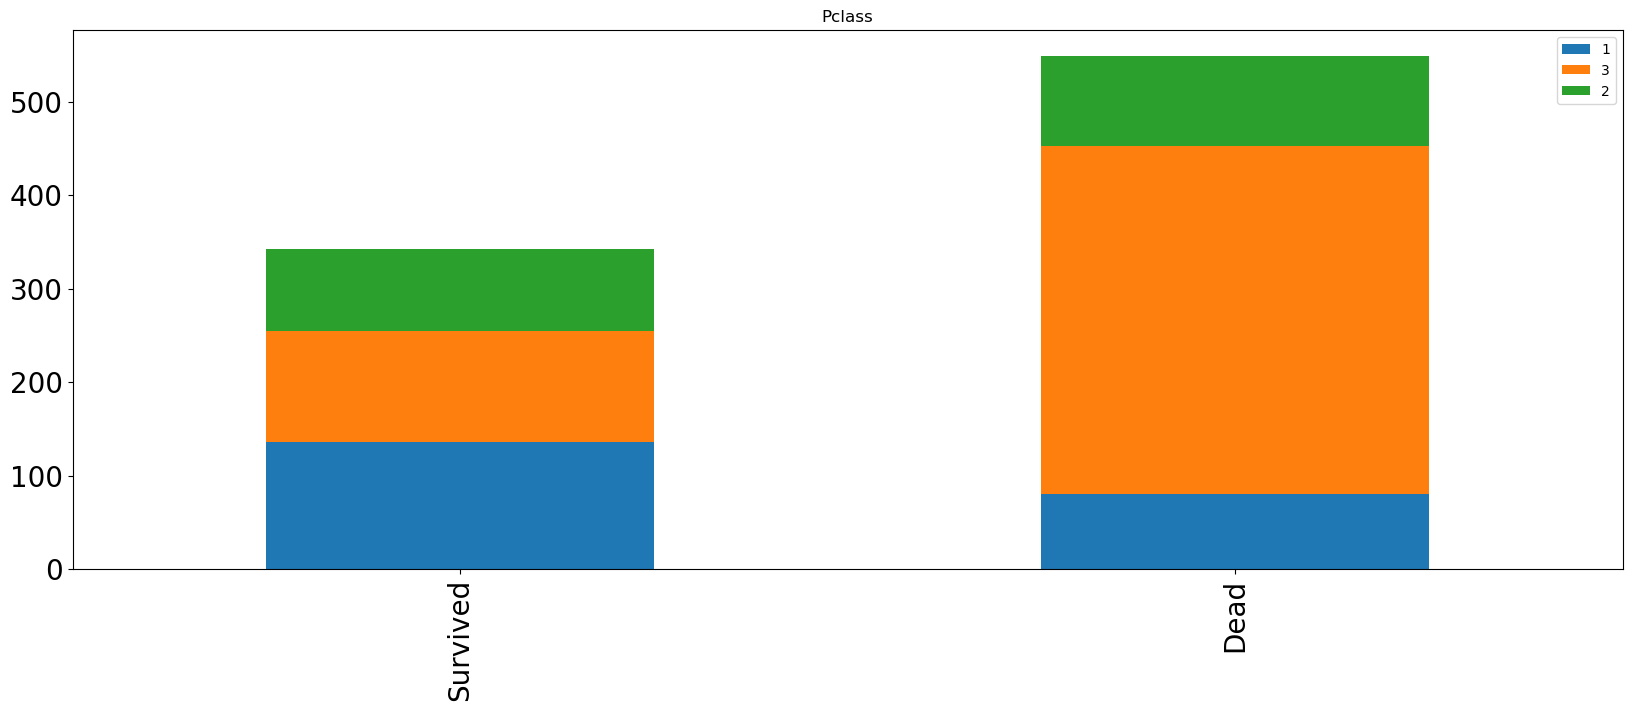

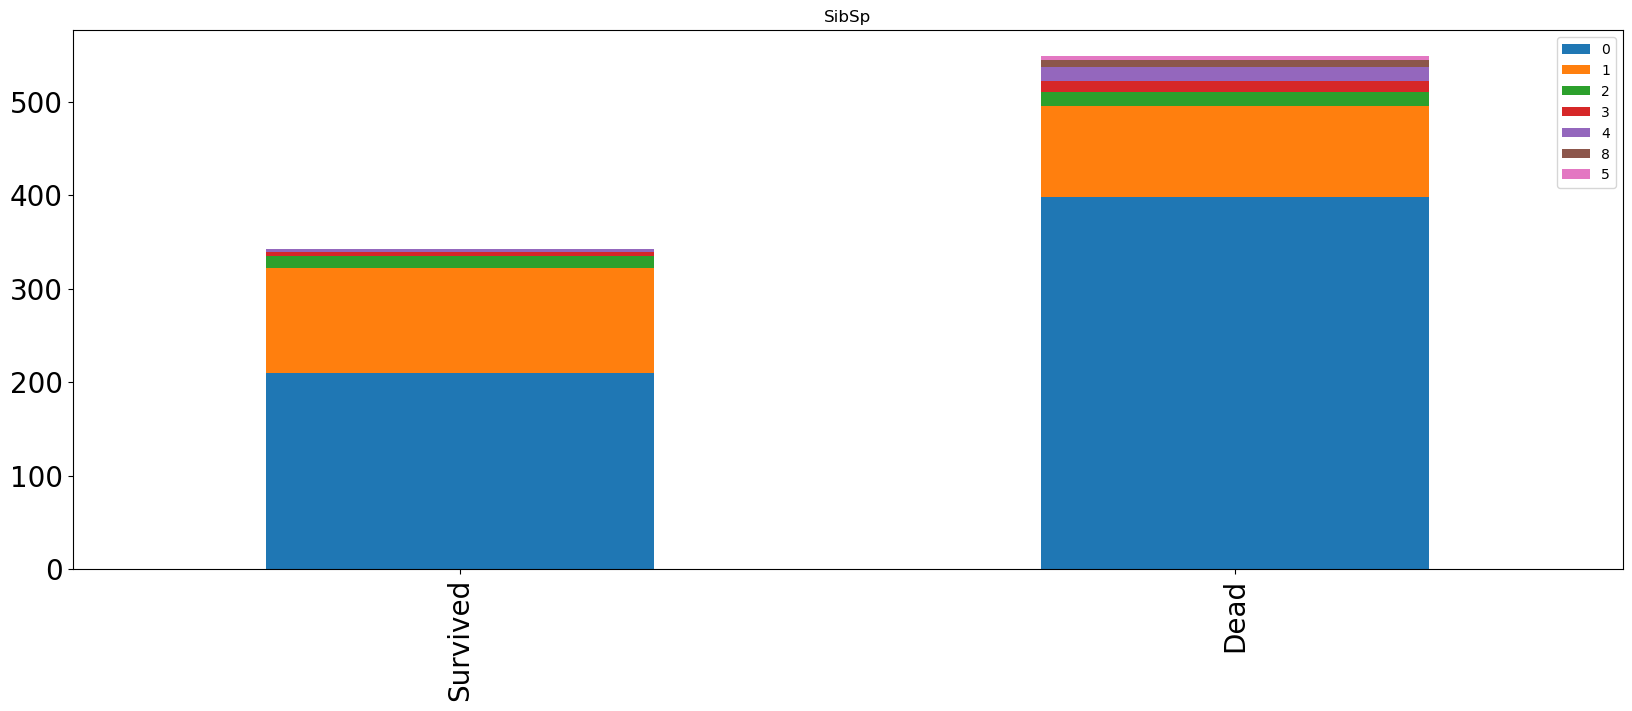

In [10]:
def bar_chart(feature):
    survived = train_df[train_df["Survived"]==1][feature].value_counts()
    dead = train_df[train_df["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["Survived","Dead"]
    df.plot(kind="bar",stacked=True, figsize=(20,7),title=feature,fontsize=20)
for a in ["Sex","Pclass","SibSp"]:
    bar_chart(a)

## 1.3 Feature Engineering
<b>the process of turning data measurements into feature bacters
From a person's point of view, text is easy to understand, but computers are much easier to change to numbers, so it means the process of changing to numbers.

# 1.3.1 Name

In [11]:
train_df.head(10)
#The name doesn't reflect much on the result, but Mr. and Mrs in the name imply information about whether or not they are married, so only extract it.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Remove names other than Mr or Mrs etc.

In [12]:
train_test_df = [train_df,test_df]

for dataset in train_test_df:
    dataset["Title"] = dataset["Name"].str.extract('([A-Za-z]+)\.',expand=False)

In [13]:
train_df["Title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [14]:
train_df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

<AxesSubplot: >

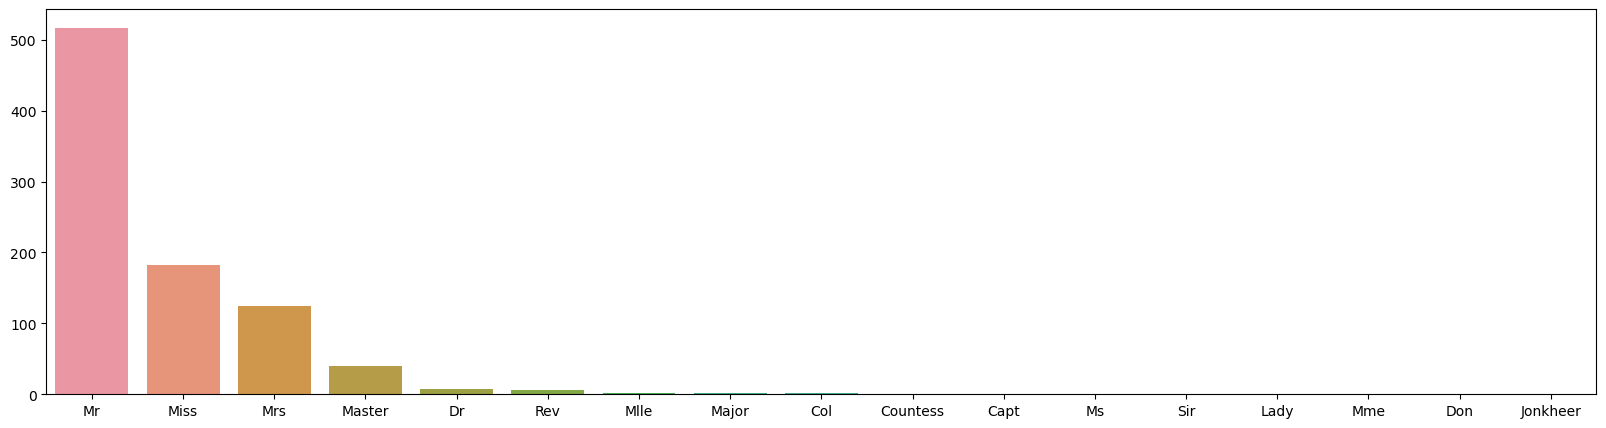

In [15]:
title = train_df["Title"].value_counts()
plt.figure(figsize =(20,5))
sns.barplot(x = title.index, y = title.values)

In [16]:
title_mapping = {
    'Mr': 0, "Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mile":3,"Countess":3,"Ms":3,"Lady":3,"Johnkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3
}

for dataset in train_test_df:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


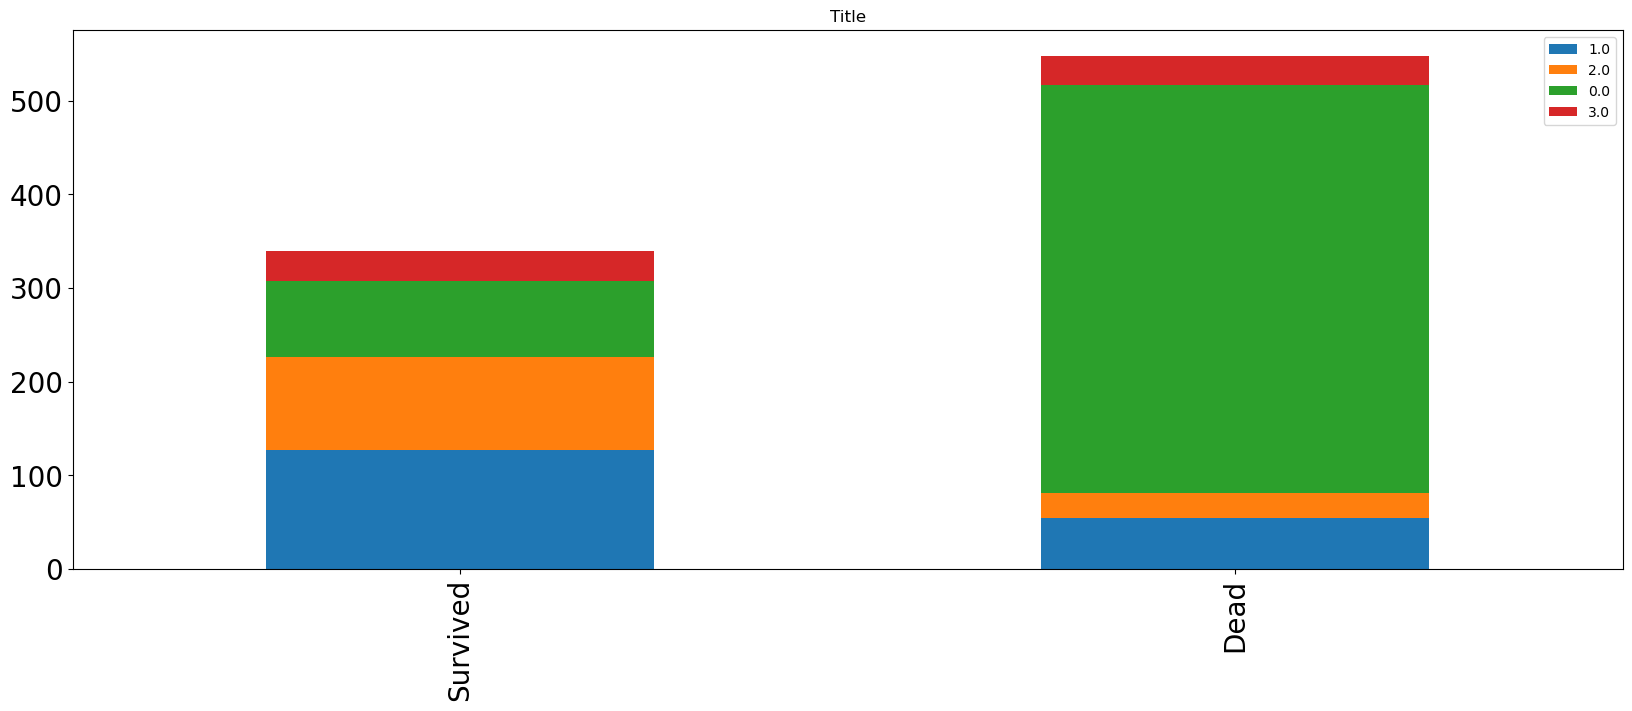

In [18]:
bar_chart("Title")

In [19]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


# 1.3.2 Sex

In [20]:
sex_mapping = {"male":0,"female":1}
for dataset in train_test_df:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

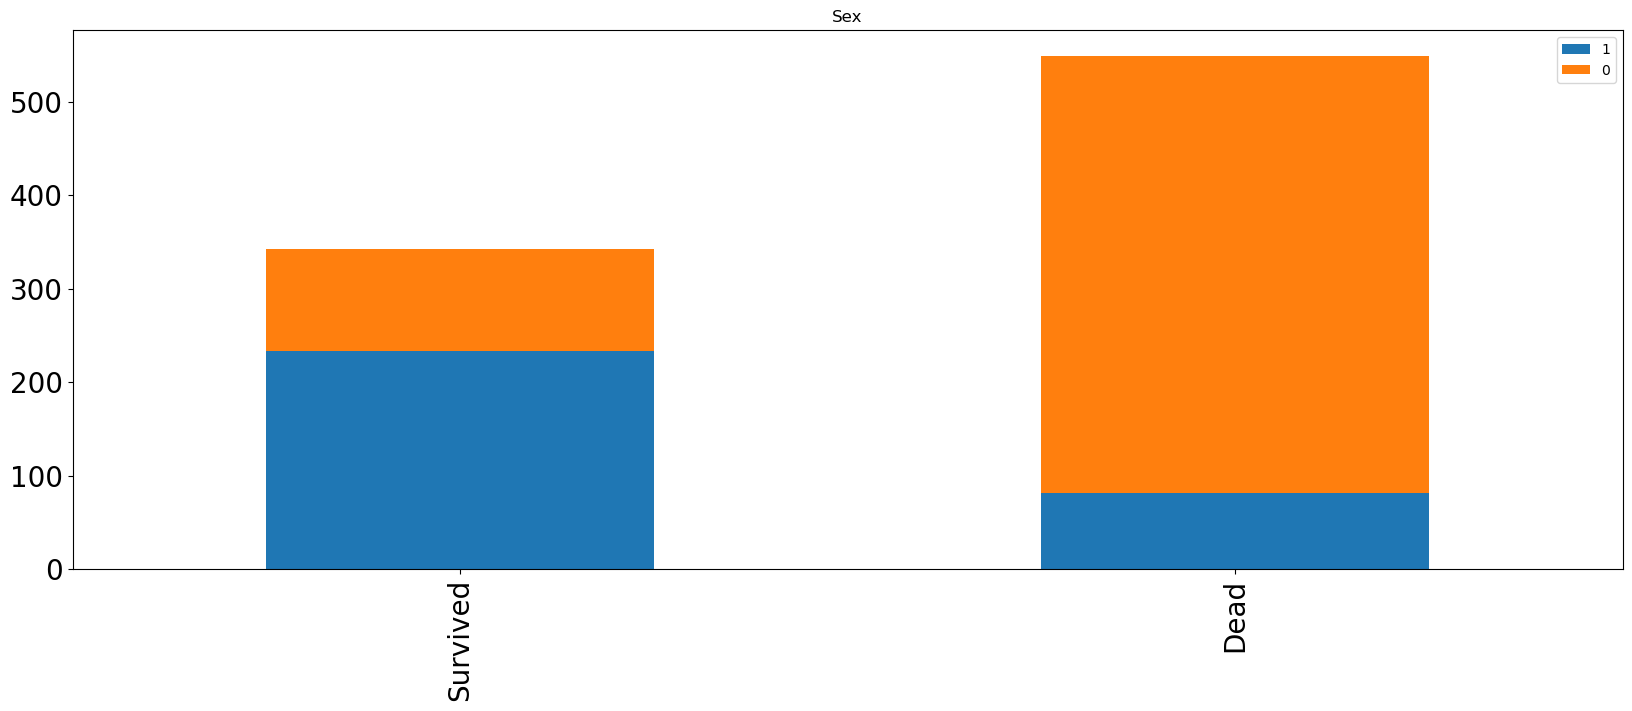

In [21]:
bar_chart("Sex")

<b>There are several NaN values for age. I can substitute those values for the total average age. But since we've divided them into categories by sex from Name, we substitute them to obtain the average age of a man and woman, if the gender of a person with NaN value is male, and if it's female, we substitute the average age of a man's average age.

In [22]:
# use median get the average age
train_df["Age"].fillna(train_df.groupby('Title')['Age'].transform("median"),inplace=True)
test_df["Age"].fillna(test_df.groupby('Title')['Age'].transform("median"),inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


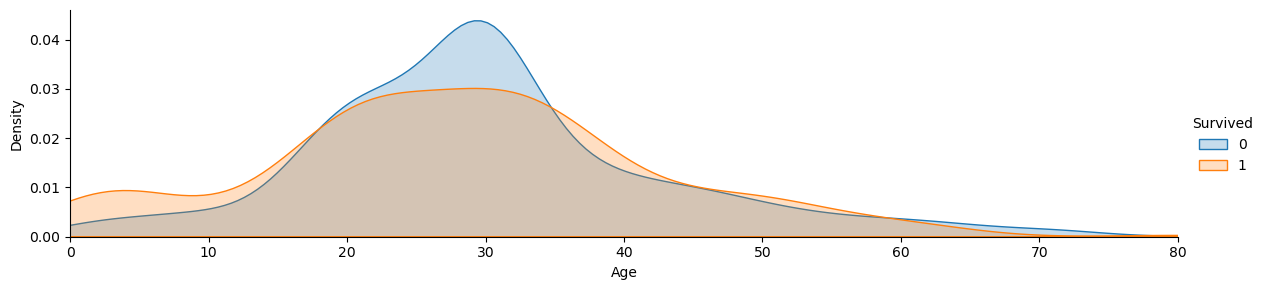

In [23]:
# visualization death - age
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_df['Age'].max()))
facet.add_legend()

plt.show()

<b>Both the most dead age group and the most surviving age group are in their 20s and mid-30s. People in their 0s to 10s and late 30s can see that there are more dead people.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

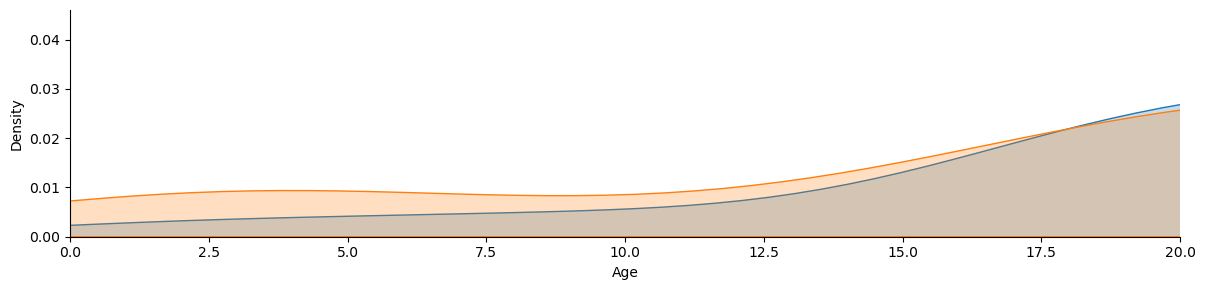

In [24]:
# visualization death - age, age between 0~20 years old
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_df["Age"].max())) # to use xlim, limitation age's range
plt.xlim(0,20) # to limitation X boundary, we can see the graph more specifically

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(20.0, 30.0)

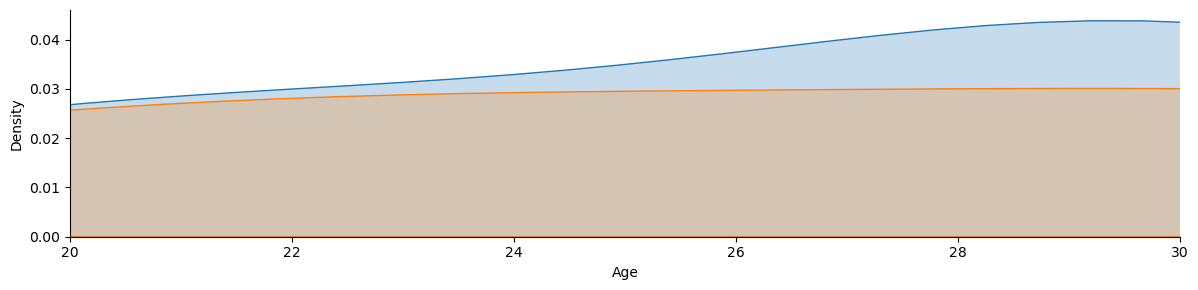

In [25]:
# visualization death - age, age between 0~20 years old
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_df["Age"].max())) # to use xlim, limitation age's range
plt.xlim(20,30)

#### 1.3.2.1 binning:

Technology that weave into categories if it don't give much information.
I will binning the Age by age. following code is the way how I did it.

In [26]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,0.0


In [27]:
df_2 = train_df["Age"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Age"]
for i in range(891):
    a = df_2['Age'].get(i)
    if int(a) <= 16:
        df_2['Age'][i] = 0
    elif int(a) > 16 and a <=26:
        df_2['Age'][i] = 1
    elif int(a) > 26 and a <= 36:
        df_2['Age'][i] = 2
    elif int(a) >36 and a <= 64:
        df_2["Age"][i] = 3
    else:
        df_2['Age'][i] = 4
        
train_df["Age"] = df_2["Age"]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,30.0000,C148,C,0.0


<b>I devided "age" into 5 part.<br>
<br>  0-16 years old - 1
<br>  16-26 years old - 2
<br>  26-36 years old - 3
<br>  36-64 years old - 4
<br>  64- years old - 5

In [28]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,28.5,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,28.5,0,0,359309,8.0500,NaN,S,0


In [29]:
df_2 = test_df["Age"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Age"]
for i in range(418):
    a = df_2['Age'].get(i)
    if int(a) <= 16:
        df_2['Age'][i] = 0
    elif int(a) > 16 and a <=26:
        df_2['Age'][i] = 1
    elif int(a) > 26 and a <= 36:
        df_2['Age'][i] = 2
    elif int(a) >36 and a < 64:
        df_2["Age"][i] = 3
    else:
        df_2['Age'][i] = 4
test_df["Age"] = df_2["Age"]
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,2.0,0,0,359309,8.0500,NaN,S,0


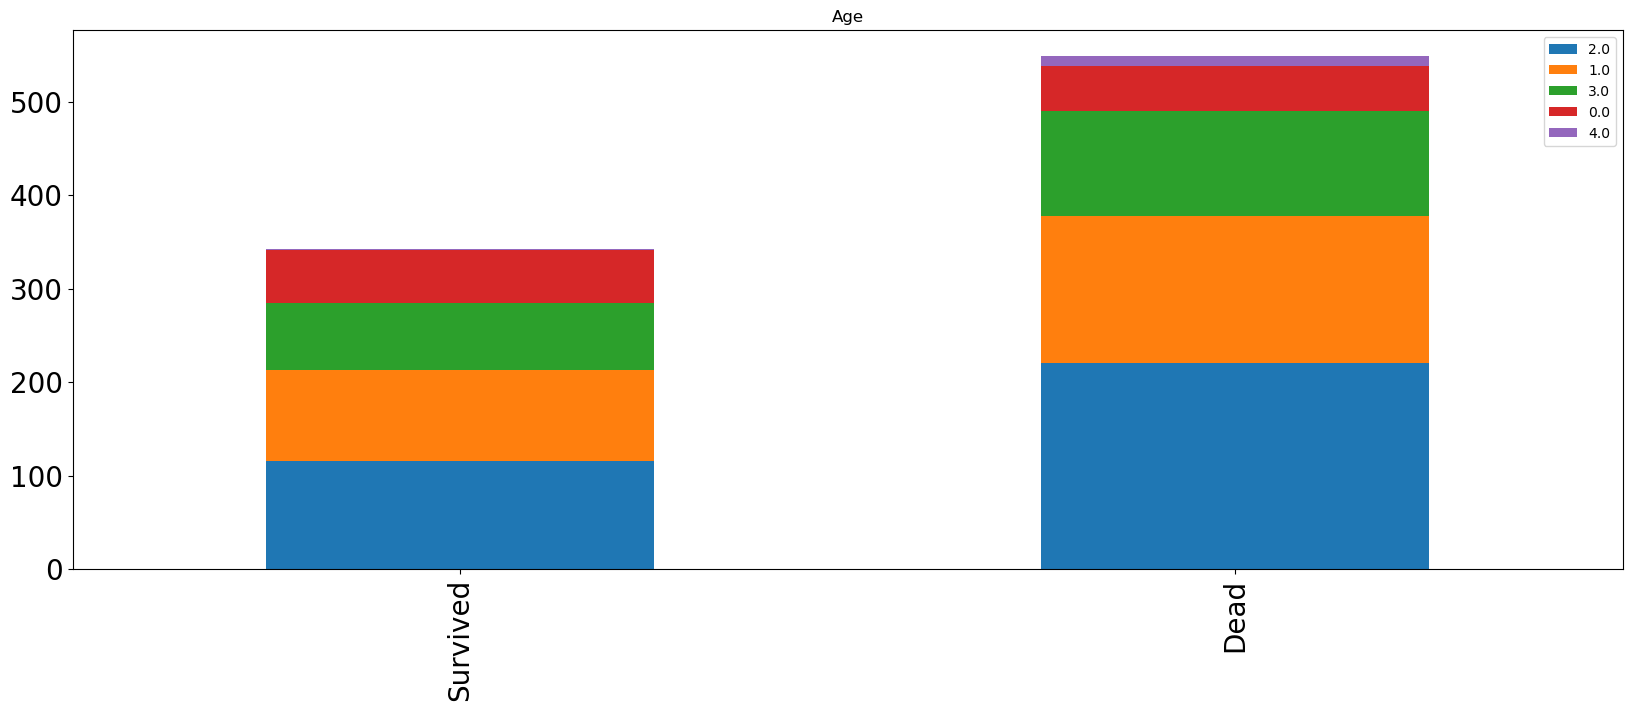

In [30]:
bar_chart("Age")

<b>Through the Bar graph, It was found that the age group of 26 to 36 years old was the highest among the dead.

# 1.3.3 Embarked

In [31]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,30.0000,C148,C,0.0


<AxesSubplot: >

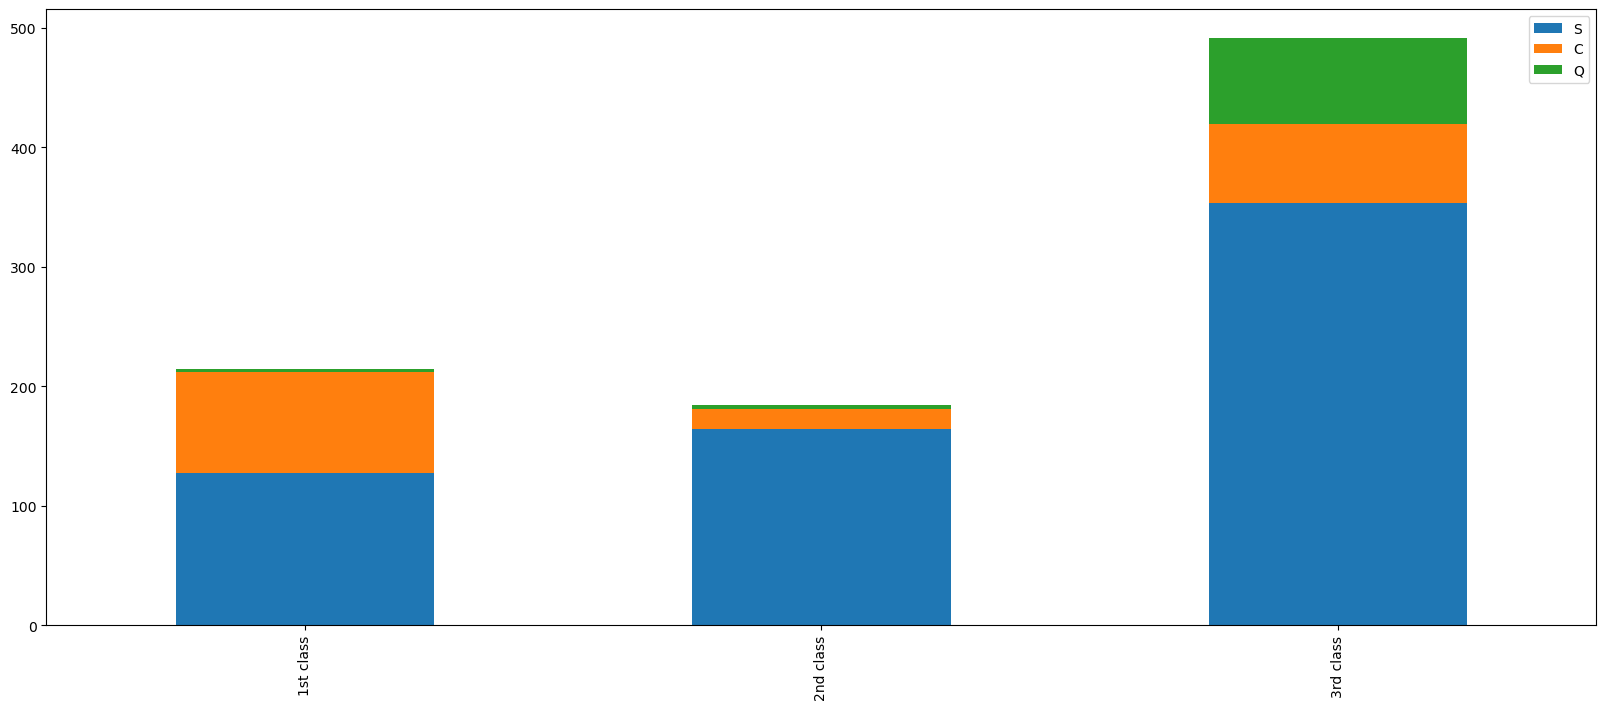

In [32]:
pclass1 = train_df[train_df["Pclass"]==1]["Embarked"].value_counts() # the place where a first-class person got off
pclass2 = train_df[train_df["Pclass"]==2]["Embarked"].value_counts() # the place where a second-class person got off
pclass3 = train_df[train_df["Pclass"]==3]["Embarked"].value_counts() # the place where a third-class person got off
df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked = True, figsize=(20,8))

In [33]:
for dataset in train_test_df:
    dataset["Embarked"] = dataset['Embarked'].fillna("S")
# fill "S" in blanked "Embarked" row
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [34]:
embarked_mapping = {"S":0,"C":1,"Q":2} # do mapping(test - number) in embarked row, for more convinence in machine learning
for dataset in train_test_df:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

# 1.3.4 Fare

In [35]:
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"),inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


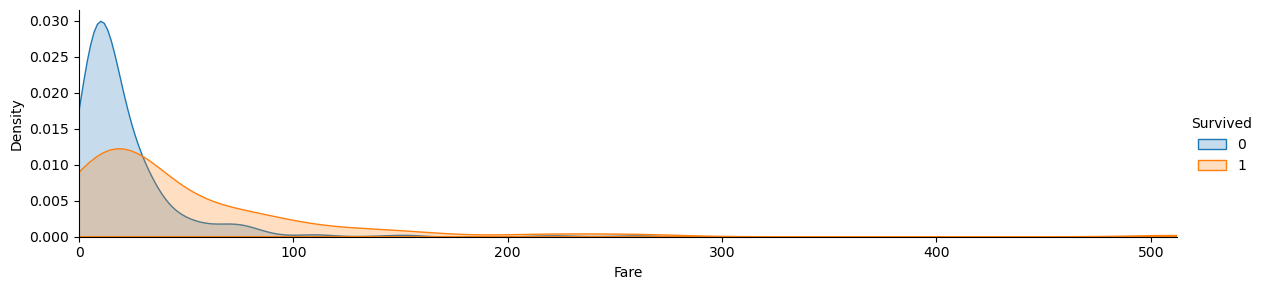

In [36]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train_df["Fare"].max()))
facet.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


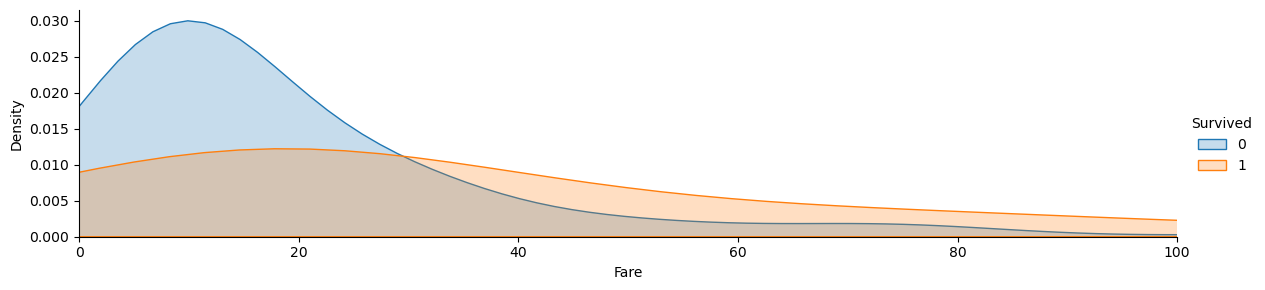

In [37]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,100))
facet.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


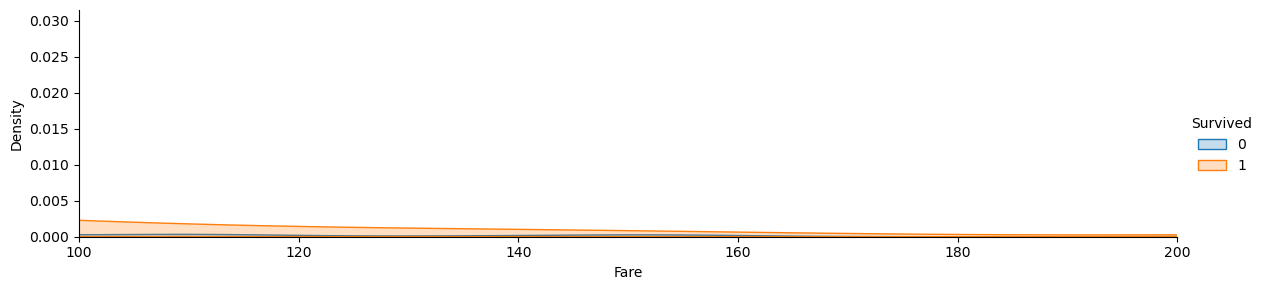

In [38]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(100,200))
facet.add_legend()

In [39]:
df_2 = train_df["Fare"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Fare"]
for i in range(891):
    a = df_2['Fare'].get(i)
    if int(a) <= 8:
        df_2['Fare'][i] = 0
    elif int(a) > 8 and a <=17:
        df_2['Fare'][i] = 1
    elif int(a) > 17 and a <= 27:
        df_2['Fare'][i] = 2
    elif int(a) >27 and a < 37:
        df_2["Fare"][i] = 3
    else:
        df_2['Fare'][i] = 4
train_df["Fare"] = df_2["Fare"]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,4.0,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,4.0,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,1.0,NaN,0,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,3.0,B42,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,2.0,NaN,0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,3.0,C148,1,0.0


In [40]:
df_2 = test_df["Fare"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Fare"]
for i in range(418):
    a = df_2['Fare'].get(i)
    if int(a) <= 8:
        df_2['Fare'][i] = 0
    elif int(a) > 8 and a <=17:
        df_2['Fare'][i] = 1
    elif int(a) > 17 and a <= 27:
        df_2['Fare'][i] = 2
    elif int(a) >27 and a < 37:
        df_2["Fare"][i] = 3
    else:
        df_2['Fare'][i] = 4
test_df["Fare"] = df_2["Fare"]
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,1.0,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,1.0,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2.0,0,0,A.5. 3236,0.0,NaN,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3.0,0,0,PC 17758,4.0,C105,1,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,0
416,1308,3,"Ware, Mr. Frederick",0,2.0,0,0,359309,0.0,NaN,0,0


# 1.3.5 cabin

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64


<AxesSubplot: >

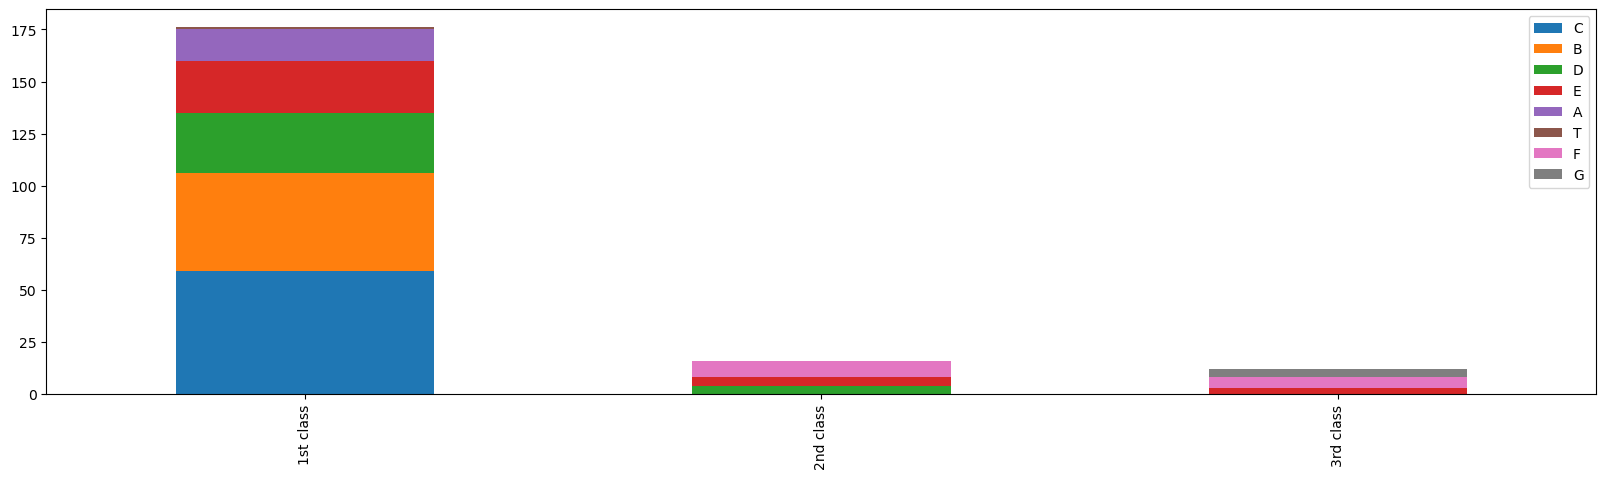

In [41]:
for dataset in train_test_df:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

pclass1 = train_df[train_df["Pclass"]==1]["Cabin"].value_counts() #1등급인 사람들의 객실수
pclass2 = train_df[train_df["Pclass"]==2]["Cabin"].value_counts() #2등급인 사람들의 객실수
pclass3 = train_df[train_df["Pclass"]==3]["Cabin"].value_counts() #3등급인 사람들의 객실수
print(pclass1)

df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked = True, figsize=(20,5))

In [42]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8} # do mapping, 
# If the range of numbers is not similar, the larger range can be considered more important.
# So I'm going to divide it up to a decimal place and give it a similar range.
# it called feature scaling.
for dataset in train_test_df:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [43]:
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

# 1.3.6 Family Size

In [44]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df['SibSp'] + test_df["Parch"] + 1

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(-3.0, 11.0)

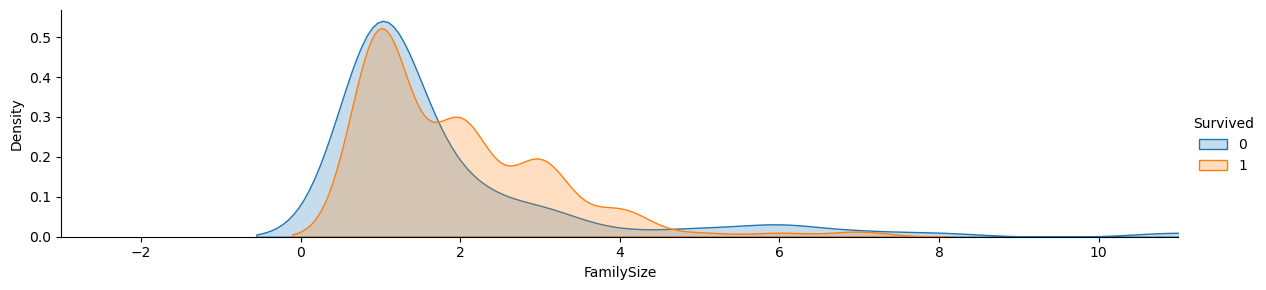

In [45]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"FamilySize",shade=True)
facet.set(xlim=(0,train_df["FamilySize"].max()))
facet.add_legend()
plt.xlim(-3)

In [46]:
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6 , 6:2 , 7:2.4 , 8:2.8, 9:3.2 , 10:3.6 , 11:4}
for dataset in train_test_df:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [47]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,4.0,0.8,1,2.0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,4.0,0.8,0,2.0,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [48]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,1.0,2.0,2,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,1.0,2.0,0,2,0.8


## Set the training set to match the test set

In [49]:
drop_list = ["Ticket","SibSp","Parch","Name"]
train_df = train_df.drop(drop_list, axis=1)
test_df = test_df.drop(drop_list, axis=1)
train_df = train_df.drop(["PassengerId"], axis=1)

In [50]:
train_data = train_df.drop("Survived", axis = 1)
target = train_df["Survived"]

train_data.fillna(0)
pd.DataFrame(train_data.isnull().value_counts())
a = pd.DataFrame(train_data["Title"]).fillna(0)
pd.DataFrame(train_data["Title"]).isnull().value_counts()
a.isnull().value_counts()
train_data["Title"] = a["Title"]
pd.DataFrame(train_data["Title"]).isnull().value_counts()


Title
False    891
dtype: int64

In [51]:
train_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,1,3.0,4.0,0.8,1,2.0,0.4
2,1,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,1,2.0,4.0,0.8,0,2.0,0.4
4,0,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,1.0,1.8,0,3.0,0.0
887,1,1,1,1.0,3.0,0.4,0,1.0,0.0
888,0,3,1,1.0,2.0,2.0,0,1.0,1.2
889,1,1,0,1.0,3.0,0.8,1,0.0,0.0


In [52]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,1.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,1.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0.0,2.0,0,0,0.0
414,1306,1,1,3.0,4.0,0.8,1,3,0.0
415,1307,3,0,3.0,0.0,2.0,0,0,0.0
416,1308,3,0,2.0,0.0,2.0,0,0,0.0



# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 2. Machine Learing </div>

In [53]:
#importing Classifier Modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle=True, random_state = 0)

In [54]:
score_list = []
score_name = []

# 2.1 KNN

In [55]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = "accuracy"
score = cross_val_score(clf,train_data, target, cv = k_fold, n_jobs = 2, scoring=scoring)
score_name.append("KNN")
print(score)

[0.8        0.78651685 0.82022472 0.80898876 0.86516854 0.82022472
 0.83146067 0.76404494 0.80898876 0.78651685]


### KNN Score

In [56]:
score = round(np.mean(score)*100,2)
score_list.append(score)
score

80.92

# 2.2 Decision Tree

In [57]:
clf = DecisionTreeClassifier()
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score_name.append("Decision Tree")
print(score)

[0.75555556 0.82022472 0.75280899 0.76404494 0.86516854 0.75280899
 0.84269663 0.78651685 0.73033708 0.78651685]


### Decision Tree Score

In [58]:
score = round(np.mean(score)*100,2)
score_list.append(score)
score

78.57

# 2.3 Random Forrest

In [59]:
clf = RandomForestClassifier(n_estimators=13)
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=5, scoring = scoring)
score_name.append("Random Forrest")
print(score)

[0.74444444 0.84269663 0.78651685 0.78651685 0.8988764  0.78651685
 0.80898876 0.82022472 0.74157303 0.82022472]


### Random Forrest Score

In [60]:
score = round(np.mean(score)*100,2)
score_list.append(score)
score

80.37

# 2.4 Naive Bayes

In [61]:
clf = GaussianNB()
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score_name.append("Naive Bayes")
print(score)

[0.84444444 0.74157303 0.75280899 0.74157303 0.73033708 0.80898876
 0.78651685 0.79775281 0.86516854 0.84269663]


### Naive Bayes Score

In [62]:
score = round(np.mean(score)*100,2)
score_list.append(score)
score

79.12

# 2.5 SVM

In [63]:
clf = SVC()
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score_name.append("SVM")
print(score)

[0.82222222 0.79775281 0.82022472 0.82022472 0.80898876 0.79775281
 0.84269663 0.84269663 0.84269663 0.86516854]


### SVM Score

In [64]:
score = round(np.mean(score)*100,2)
score_list.append(score)
score

82.6

In [65]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier()
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score_name.append("GBC")
print(score)

[0.84444444 0.83146067 0.80898876 0.84269663 0.86516854 0.80898876
 0.82022472 0.80898876 0.78651685 0.82022472]


In [66]:
score = round(np.mean(score)*100,2)
score_list.append(score)
score

82.38

# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 3. Compare ML Score Visuallization </div>

<BarContainer object of 6 artists>

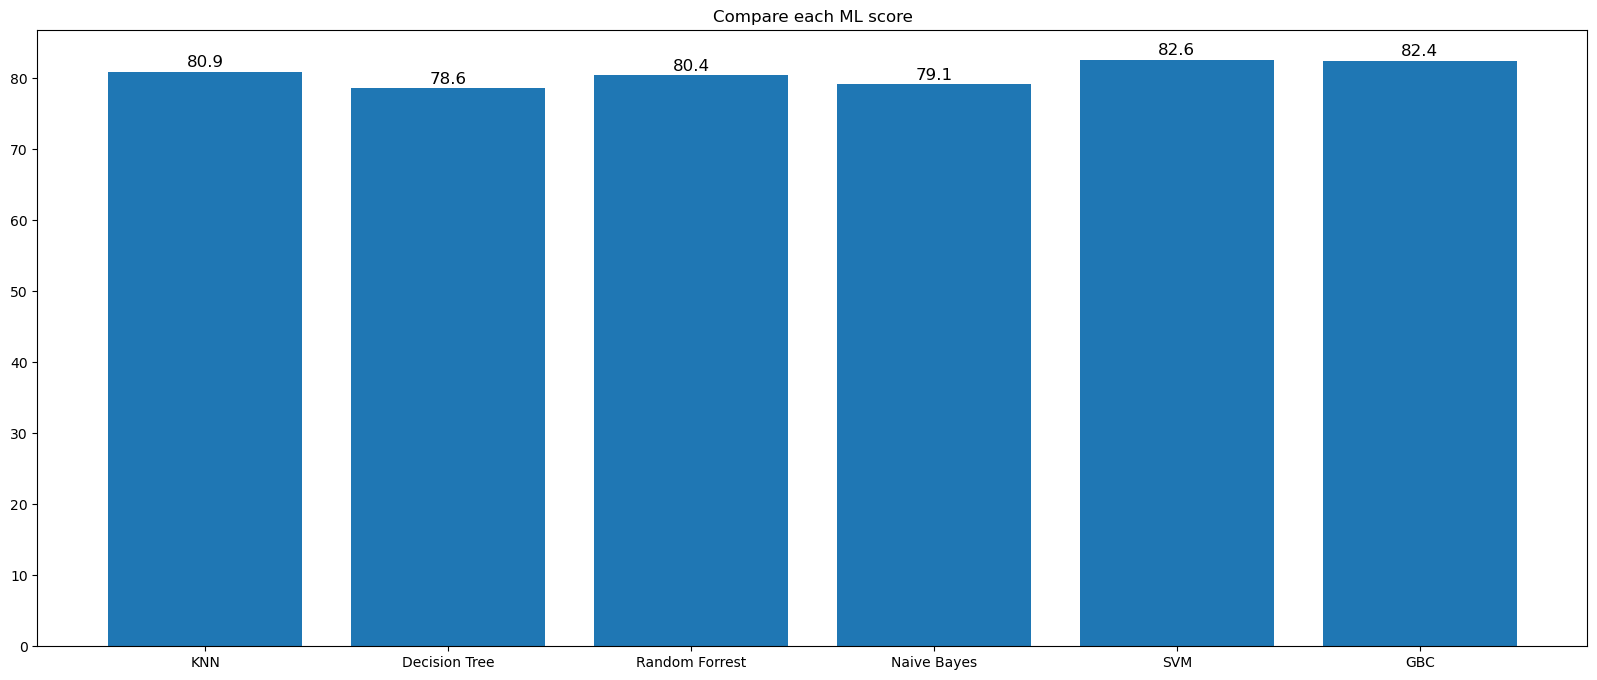

In [67]:
x = score_name
y = score_list
plt.figure(figsize=(20,8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
    
plt.title("Compare each ML score")
plt.bar(x,y)

## 2.6 Machine Learning Result

<b> It is found that SVM Score is the highest score among the score result.<br>
    <br> So I decided to submit my prediction which is used SVM.

testing

In [68]:
clf = SVC()
clf.fit(train_data, target)
# drop unnecessary column
test_data = test_df.drop("PassengerId", axis = 1).copy()
prediction = clf.predict(test_data)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 4. Use Deep learning Predict Result </div>

In [69]:
import tensorflow as tf

2023-02-04 01:37:19.977170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 01:37:20.191241: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 01:37:20.191280: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 01:37:21.519450: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [70]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,4.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,4.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,1.0,1.8,0,3.0,0.0
887,1,1,1.0,3.0,0.4,0,1.0,0.0
888,3,1,1.0,2.0,2.0,0,1.0,1.2
889,1,0,1.0,3.0,0.8,1,0.0,0.0


In [71]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [72]:
import tensorflow as tf

model = tf.keras.models.Sequential(
[
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(np.array(train_data), np.array(target), epochs=50)

# if my deep learning model need to fix or improve, please leave a comment/feedback how should I fix it. 

2023-02-04 01:37:22.728697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-04 01:37:22.728766: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-04 01:37:22.728818: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b748d39e2410): /proc/driver/nvidia/version does not exist
2023-02-04 01:37:22.729355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
28/28 [==============================] - 3s 9ms/step - loss: 0.6708 - accuracy: 0.6027
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.6173
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.6813
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.5386 - accuracy: 0.7699
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.5114 - accuracy: 0.7800
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 0.5051 - accuracy: 0.7845
Epoch 7/50
28/28 [==============================] - 0s 11ms/step - loss: 0.4680 - accuracy: 0.8047
Epoch 8/50
28/28 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.8081
Epoch 9/50
28/28 [==============================] - 0s 6ms/step - loss: 0.4716 - accuracy: 0.8148
Epoch 10/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4525 - accuracy: 0.8159
Epoch 11/50
28/28 

In [73]:
submission_dl = []

In [74]:
for i in range(len(model.predict(test_data))):
    if model.predict(test_data)[i][0] > 0.5:
        submission_dl.append(1)
    else:
        submission_dl.append(0)
# print(submission_dl)

14/14 [==============================] - 0s 2ms/step


In [75]:
prediction_dl = np.array(submission_dl)

# 3. Submission

In [80]:
submission = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":prediction_dl
    # if you want submit MachineLearning Score, use "prediction"
    # if you want submit DeepLearning Score, use "prediction_dl"
    # as my submittion result, Machine Learning Score higher than Deep learning Score. So I choose ML Score.
})

submission.to_csv("submission_dl.csv",index=False)

In [77]:
submission = pd.read_csv("submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [78]:
# Correlation Analysis